In [1]:
import numpy as np
from skimage import io,  util
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray


Text(0.5, 1.0, 'test_image_dif')

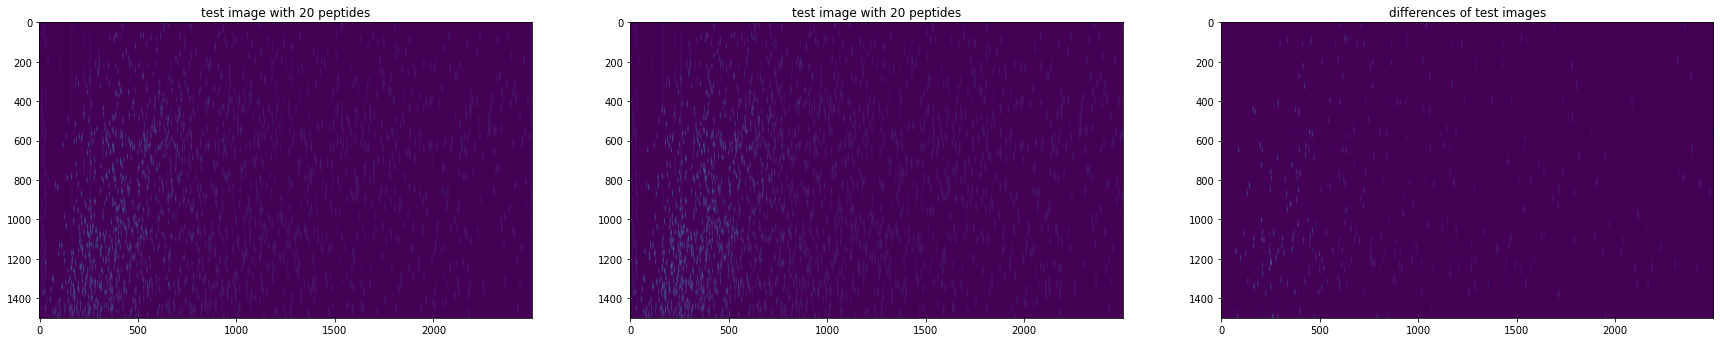

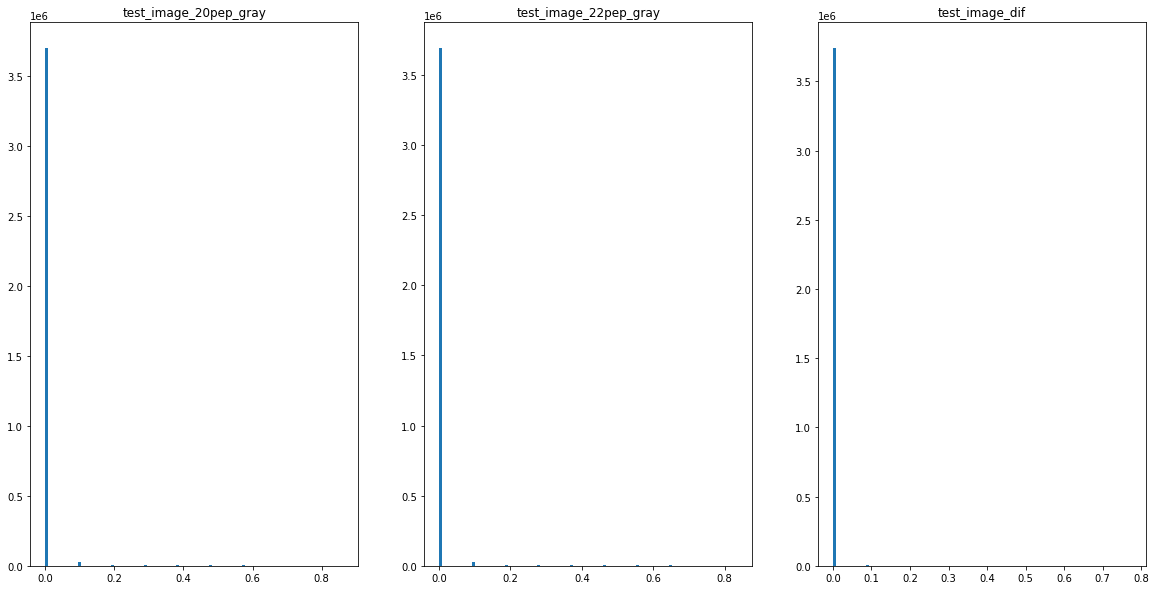

In [2]:
#Read mean of the Train!!!! images of two classes (20 peptides and 22 peptides)
test_image_20pep = io.imread('mean_train_images/mean_trainImage_20pep.png')
test_image_20pep_gray = rgb2gray(test_image_20pep)


test_image_22pep = io.imread('mean_train_images/mean_trainImage_22pep.png')
test_image_22pep_gray = rgb2gray(test_image_22pep)

test_image_dif_ = ( np.subtract(test_image_22pep_gray, test_image_20pep_gray) )
test_image_dif = np.abs(test_image_dif_)
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (30,30))
ax1.imshow(test_image_20pep_gray)
ax1.set_title('test image with 20 peptides')
ax2.imshow(test_image_22pep_gray)
ax2.set_title('test image with 20 peptides')
ax3.imshow(test_image_dif)
ax3.set_title('differences of test images')

#Histogram
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize= (20,10))
countimage20, binsimage20 = np.histogram((test_image_20pep_gray))
ax1.hist(binsimage20[:-1], bins=100, weights=countimage20)
ax1.set_title('test_image_20pep_gray')

countimage22, binsimage20 = np.histogram((test_image_22pep_gray))
ax2.hist(binsimage20[:-1], bins=100, weights=countimage22)
ax2.set_title('test_image_22pep_gray')

countsdif, binsdif = np.histogram((test_image_dif))
ax3.hist(binsdif[:-1], bins=100, weights=countsdif)
ax3.set_title('test_image_dif')

In [3]:
# io.imsave('/home/sahar/innvestigate/LC-MassSpectrometry_Application/newDataset/Images1500by2500-NoiseReduction/test_image_dif.png',test_image_dif)

Text(0.5, 1.0, 'multipication_testdif_Interpretation22')

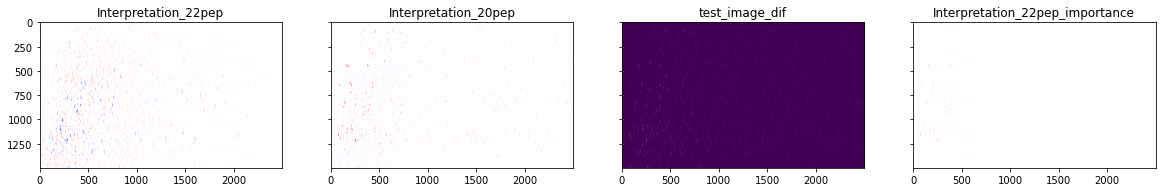

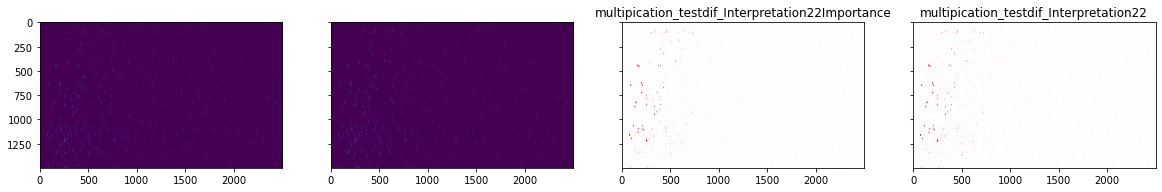

In [4]:
#Read interpretation of the above images (mean of the test images of two classe).the network is from the classification2020

#Read interpretation of the above images (mean of the test images of two classe).the network is from the classification2020

Interpretation_20pep = np.load('interpretation-mean_train_images/\
lrp.zmean_trainImage_20pep.png.npy')


Interpretation_22pep = np.load('interpretation-mean_train_images/\
lrp.zmean_trainImage_22pep.png.npy')



Interpretation_dif = np.subtract(Interpretation_22pep, Interpretation_20pep)
Interpretation_22pep_importance = np.abs(Interpretation_22pep)
# Interpretation_22pep_importance[np.where(Interpretation_22pep_importance<=0.002)]=0

multipication_testdif_Interpretation22 = np.multiply(np.abs(test_image_dif),(Interpretation_22pep))

multipication_testdif_Interpretation22Importance = np.multiply(np.abs(test_image_dif),(Interpretation_22pep_importance))

#Important features for other class = the negetive relevance values for this class
Interpretation_20pep_importance = np.abs( np.copy(Interpretation_20pep) )
multipication_testdif_Interpretation20Importance = np.multiply(np.abs(test_image_dif),np.abs(Interpretation_20pep_importance))

Interpretation_20pep_preprop = np.copy(Interpretation_20pep)
Interpretation_20pep_preprop[np.where( (Interpretation_20pep>=0)) ]=0
Interpretation_20pep_preprop = np.abs(Interpretation_20pep_preprop)

f2, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey = True, figsize = (20,20))
ax1.imshow(Interpretation_20pep, cmap="seismic", clim=(-0.3, 0.3))
ax1.set_title('Interpretation_22pep')
ax2.imshow(Interpretation_22pep, cmap="seismic", clim=(-0.3, 0.3))
ax2.set_title('Interpretation_20pep')
ax3.imshow(test_image_dif)
ax3.set_title('test_image_dif')

ax4.imshow(Interpretation_22pep_importance, cmap="seismic", clim=(-1, 1))
ax4.set_title('Interpretation_22pep_importance')

f3, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey = True, figsize = (20,20))
ax1.imshow(test_image_dif)
ax2.imshow(test_image_dif)

ax3.imshow(multipication_testdif_Interpretation22Importance, cmap="seismic", clim=(-0.1, 0.1))
ax3.set_title('multipication_testdif_Interpretation22Importance')

ax4.imshow(multipication_testdif_Interpretation22, cmap="seismic", clim=(-0.1, 0.1))
ax4.set_title('multipication_testdif_Interpretation22')


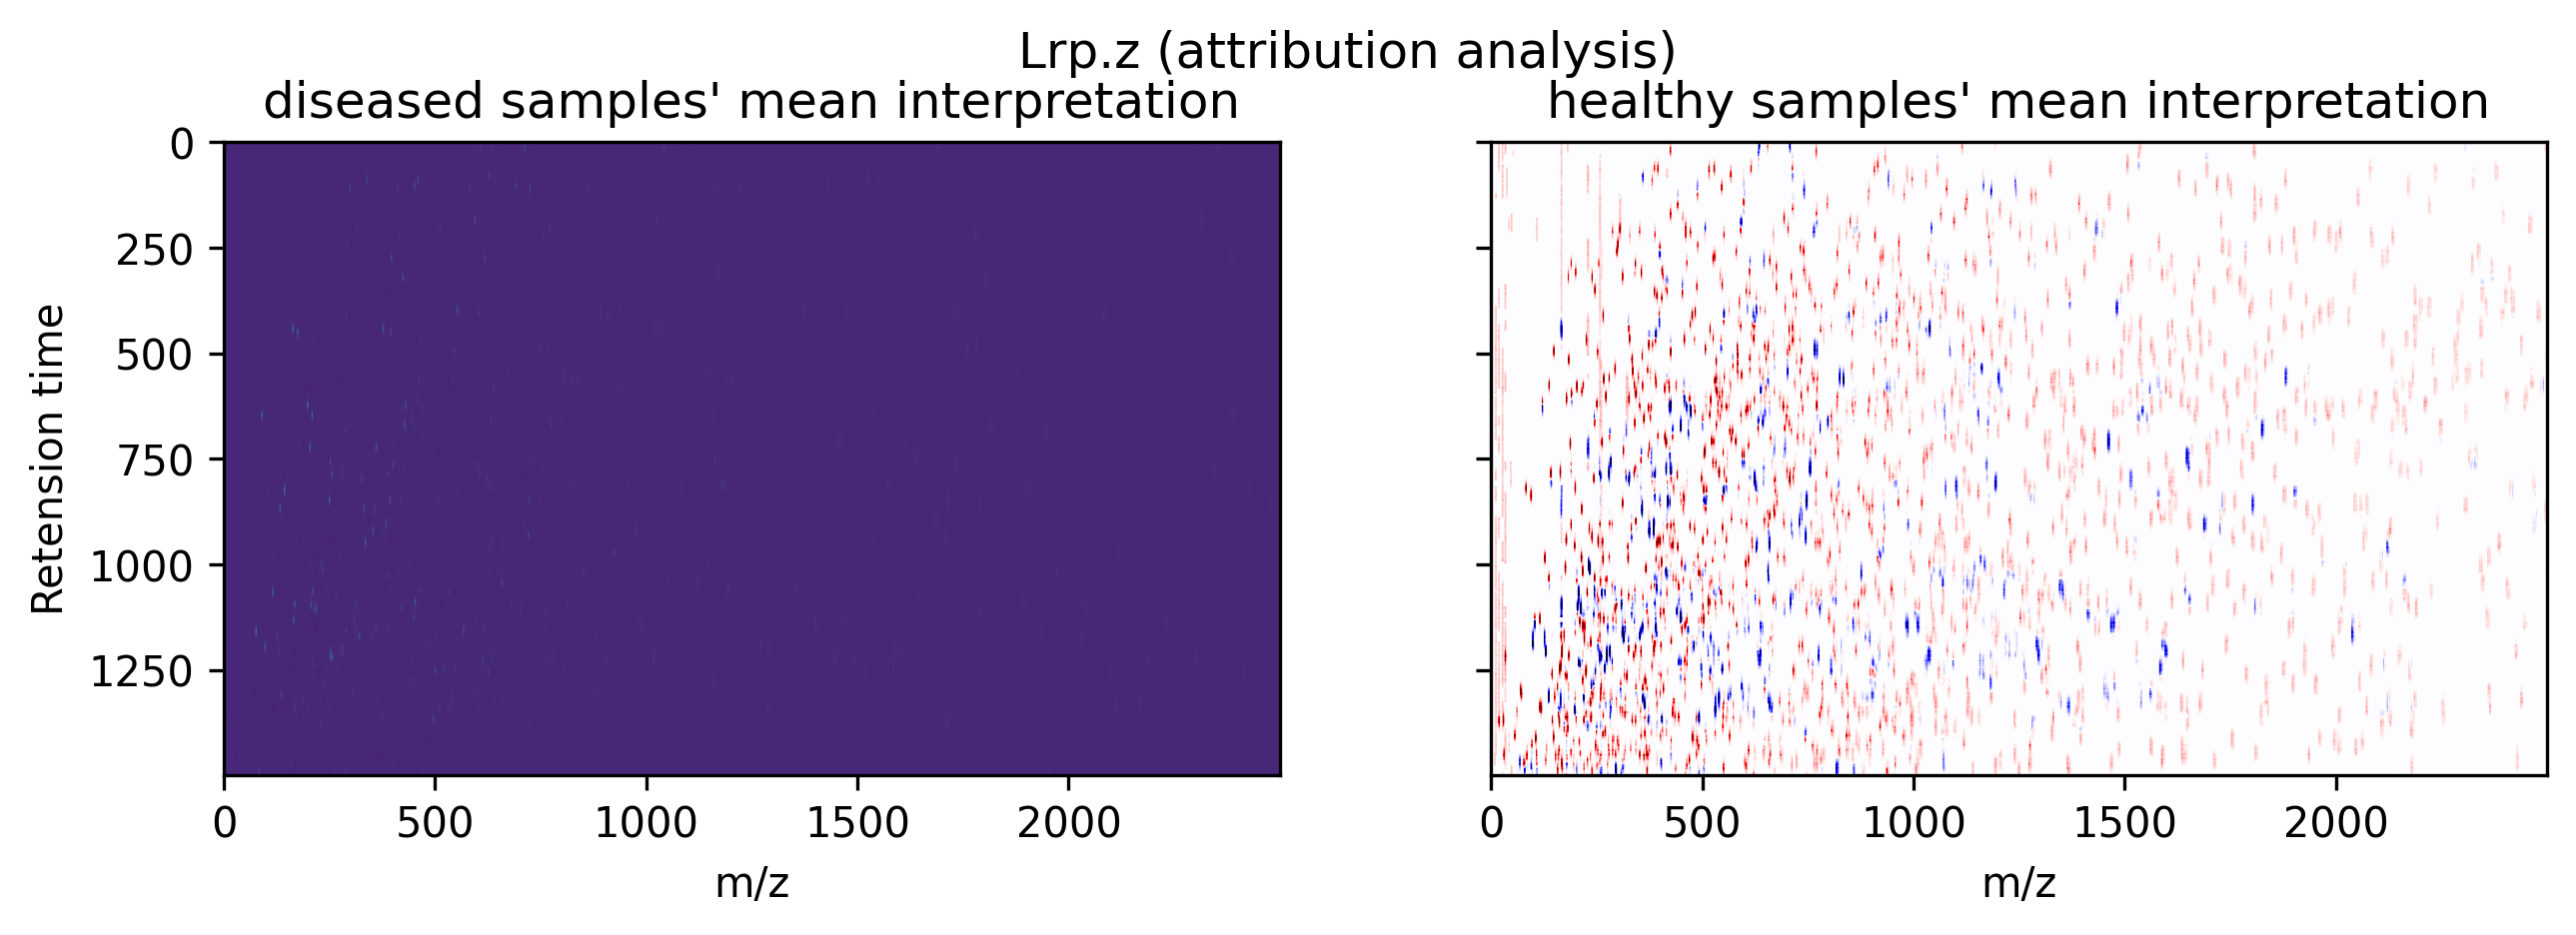

In [5]:
f2, (ax1, ax2) = plt.subplots(1,2, sharey = True, figsize = (10,3), dpi = 300)

f2.suptitle('Lrp.z (attribution analysis)')
ax1.imshow(Interpretation_22pep)#, cmap="seismic", clim=(-0.04, 0.04), )

ax1.set_title('diseased samples\' mean interpretation')
ax1.set_xlabel('m/z')
ax1.set_ylabel('Retension time')
ax2.imshow(Interpretation_20pep, cmap="seismic", clim=(-0.07, 0.07))
ax2.set_xlabel('m/z')
ax2.set_title('healthy samples\' mean interpretation')
plt.savefig('lrpz_interpretation_Visualization.png')



Text(0.5, 1.0, 'multipication_testdif_Interpretation22')

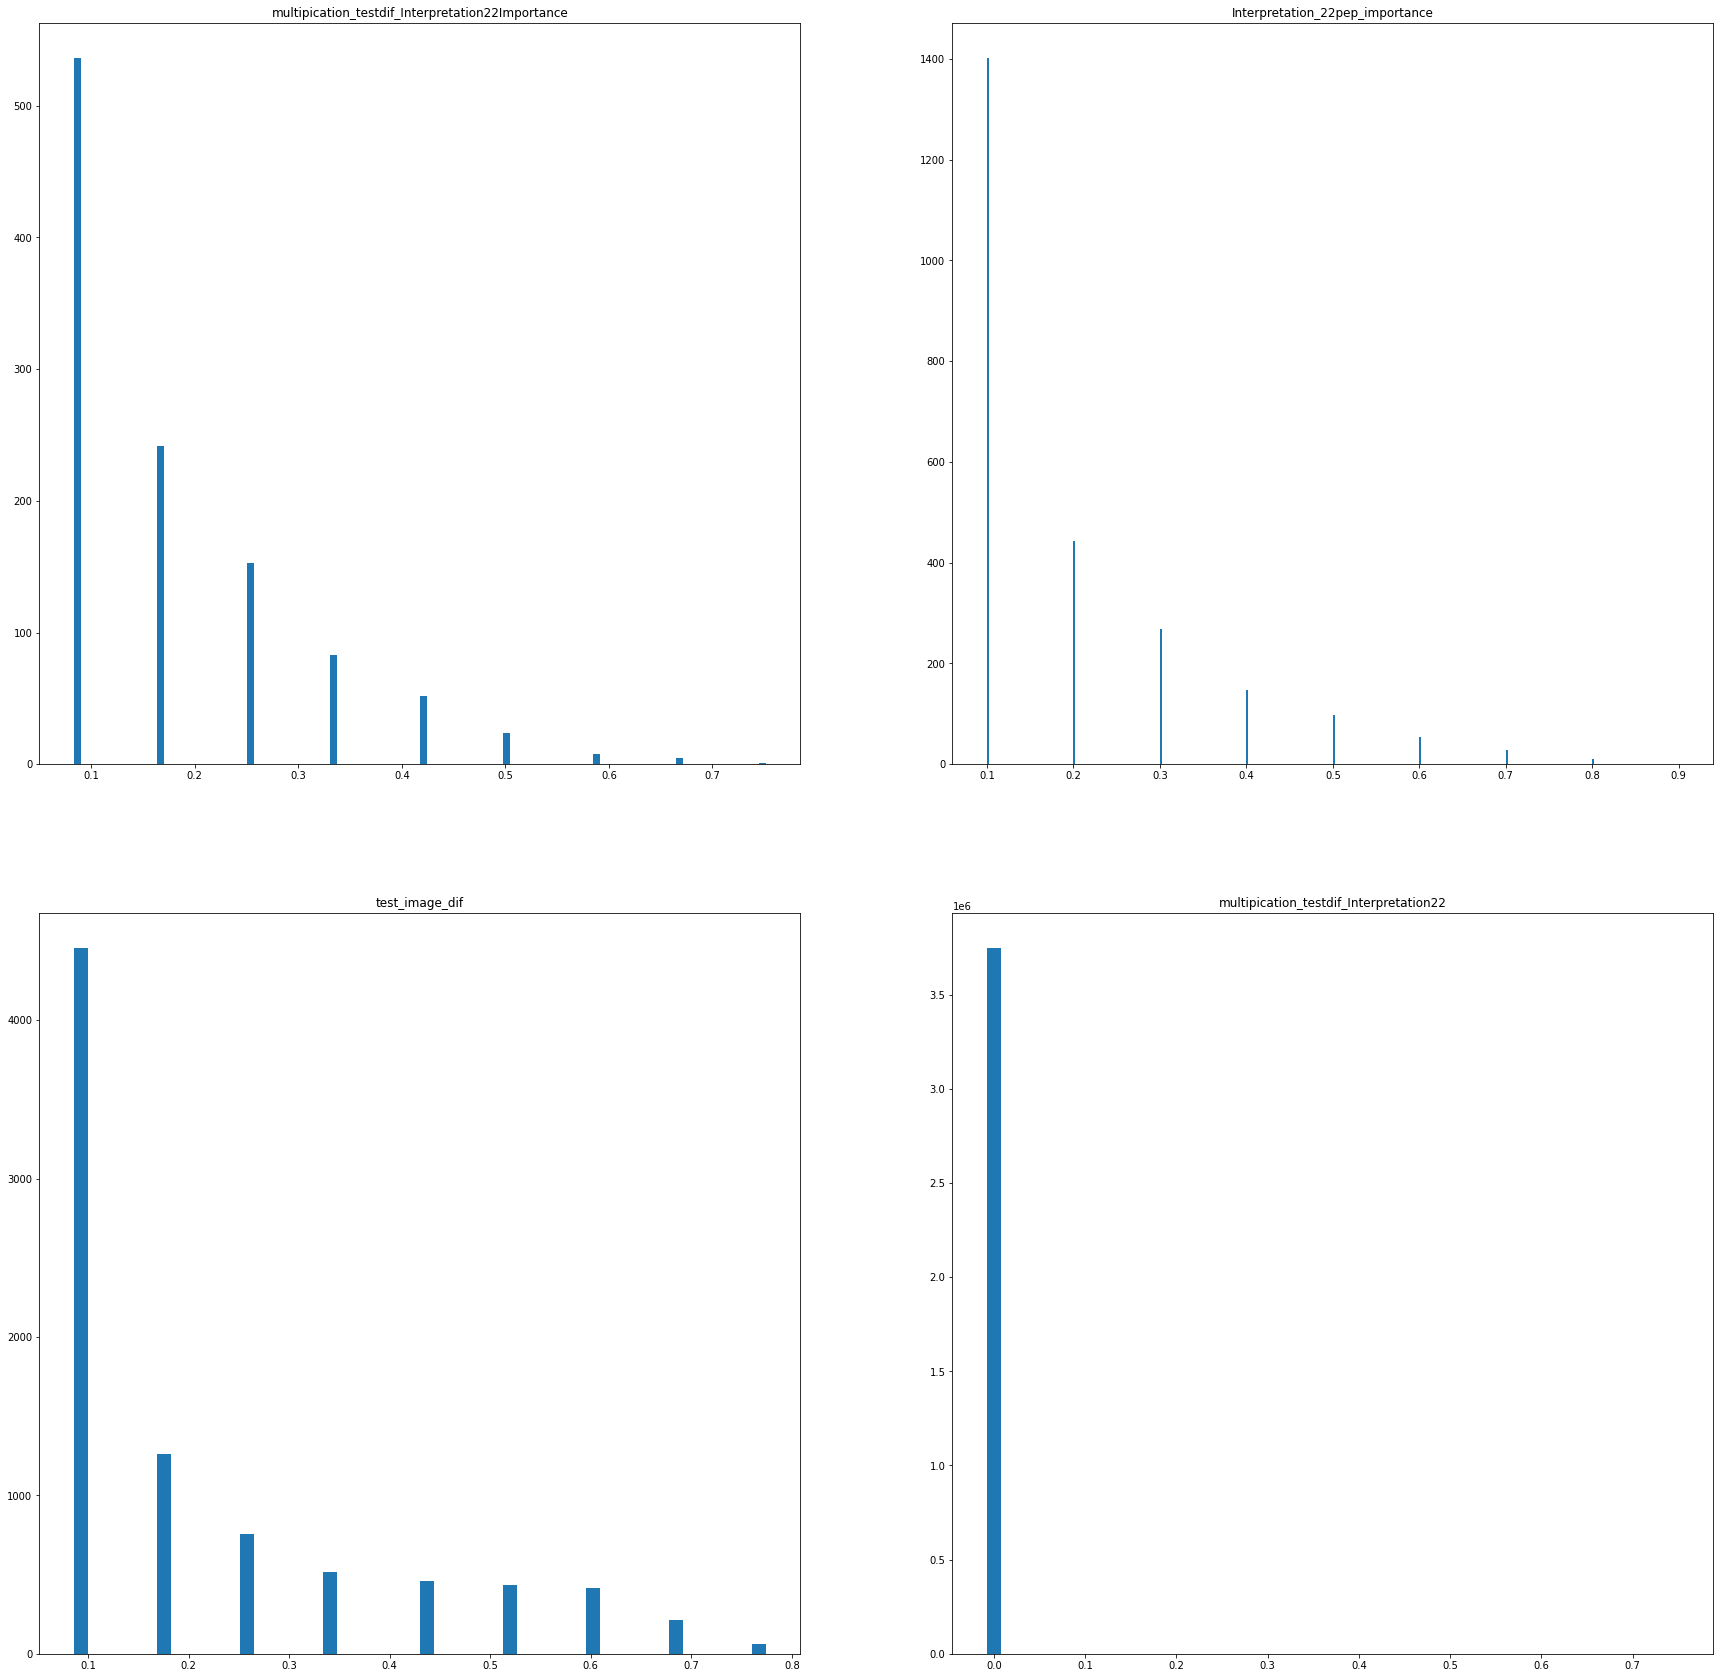

In [7]:
#Hitogram of Interpretations
f3, axs = plt.subplots(2, 2,    figsize= (30,30))

# f3,(ax1, ax2) = plt.subplots(1,2 , sharey=True, figsize=(20,5))
countsmultipication_testdif_Interpretation22Importance, binsmultipication_testdif_Interpretation22_Importance\
= np.histogram((multipication_testdif_Interpretation22Importance))
axs[0,0].hist(binsmultipication_testdif_Interpretation22_Importance[1:-1], bins=100, weights=countsmultipication_testdif_Interpretation22Importance[1:])
axs[0,0].set_title('multipication_testdif_Interpretation22Importance')

counts22, bins22 = np.histogram(((Interpretation_22pep_importance)))
axs[0,1].hist(bins22[1:-1], bins=400, weights=counts22[1:])
axs[0,1].set_title('Interpretation_22pep_importance')

countstest_image_dif, binstest_image_dif = np.histogram((test_image_dif))
axs[1,0].hist(binstest_image_dif[1:-1], bins=50, weights=countstest_image_dif[1:])
axs[1,0].set_title('test_image_dif')

countmultipication_testdif_Interpretation22, binsmultipication_testdif_Interpretation22 = np.histogram((multipication_testdif_Interpretation22))
axs[1,1].hist(binsmultipication_testdif_Interpretation22[:-1], bins=50, weights=countmultipication_testdif_Interpretation22[:])
axs[1,1].set_title('multipication_testdif_Interpretation22')


In [8]:
# #y_ture: image of diff, y_pred: interpretation
def ROI_function(diff, diff_trs, interpretation, interpretation_trs):
    #Convert the variable to values 0 and 1 with threshhold 0.5
    y_true = np.zeros((1500,2500), np.int)
    y_pred = np.zeros((1500,2500), np.int)
    
    y_true[diff > diff_trs]=1
    y_pred[interpretation>=interpretation_trs]=1

    smooth = 1.
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    roi = (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)
    # the common area over the interpretation or (the percantage of relevant peaks with respect to all seleceted peaks)
    r_  = (intersection + smooth)/(np.sum(y_pred_f)+smooth)
    # the common arae over true difference of two class 
    r__ = (intersection + smooth)/(np.sum(y_true_f)+smooth)
    fig ,(ax1,ax2)=plt.subplots(1,2, figsize = (20,30))
    
    ax1.imshow(y_true)
    ax1.set_title('y_true')
    
    ax2.imshow(y_pred)
    ax2.set_title('y_pred')
    print(roi , r_, r__)
    return roi , r_, r__, y_pred, y_true

In [9]:
# #y_ture: image of diff, y_pred: interpretation
def ROI_function_modified(diff, diff_trs, interpretation22, interpretation_trs22, interpretation20, interpretation_trs20):
    #Convert the variable to values 0 and 1 with threshhold 0.5
    y_true = np.zeros((1500,2500), np.int)
    y_pred = np.zeros((1500,2500), np.int)
    
    y_true[diff > diff_trs]=1
    y_pred[interpretation22>=interpretation_trs22 ]=1
    y_pred[interpretation20<=interpretation_trs20]=0
    
    
    smooth = 1.
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    roi = (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)
    # the common area over the interpretation or (the percantage of relevant peaks with respect to all seleceted peaks)
    r_  = (intersection + smooth)/(np.sum(y_pred_f)+smooth)
    # the common arae over true difference of two class 
    r__ = (intersection + smooth)/(np.sum(y_true_f)+smooth)
    fig ,(ax1,ax2)=plt.subplots(1,2, figsize = (20,30))
    
    ax1.imshow(y_true)
    ax1.set_title('y_true')
    
    ax2.imshow(y_pred)
    ax2.set_title('y_pred')
    print(roi , r_, r__)
    #     print('ROI is ', roi )
#     print('percentage of selected relevant peaks with respect to all selected peaks is ',r_ )
#     print('percentage of selected relevant peaks with respect to all true peaks is ',r__ )
    return roi , r_, r__, y_pred, y_true

<ipython-input-8-b3bda7bc4b53>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.zeros((1500,2500), np.int)
<ipython-input-8-b3bda7bc4b53>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

0.6658208832177633 0.5802599227256762 0.7809867629362214
0.7839071758903332 0.8718036409554878 0.7121153515557848


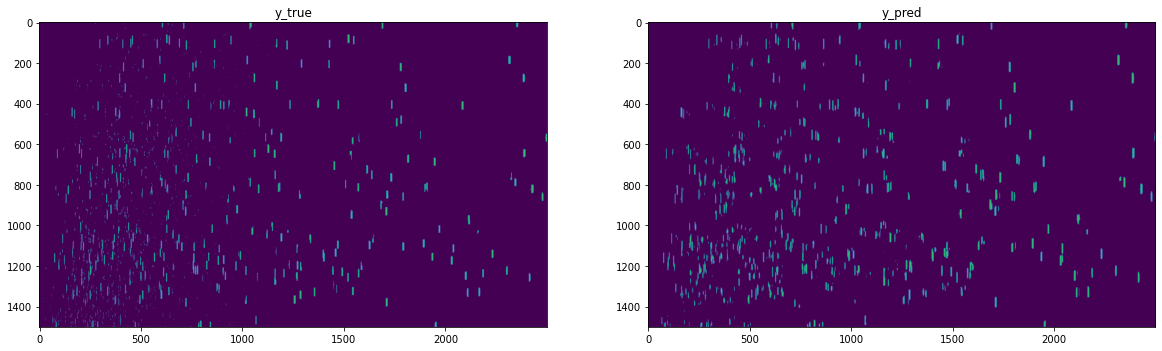

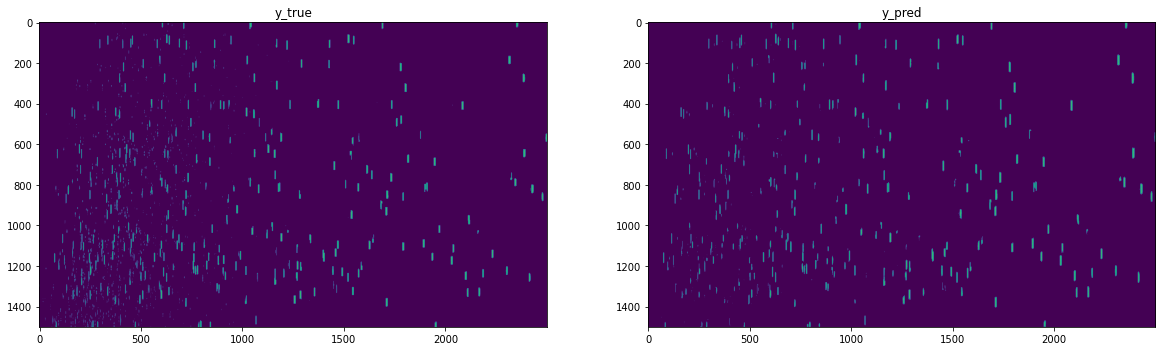

In [10]:
roi , r_, r__, y_pred_22, y_true_22 = ROI_function((test_image_dif),0.04,Interpretation_22pep,0.005)
roi , r_, r__, y_pred_22, y_true_22 = ROI_function_modified((test_image_dif),0.04,\
                                                            Interpretation_22pep,0.005, Interpretation_20pep, -0.01)

Find the maxmum value of Interpretation and visulalize the location in the original image

Text(0.5, 1.0, 'healthy interpretation around the most important variable')

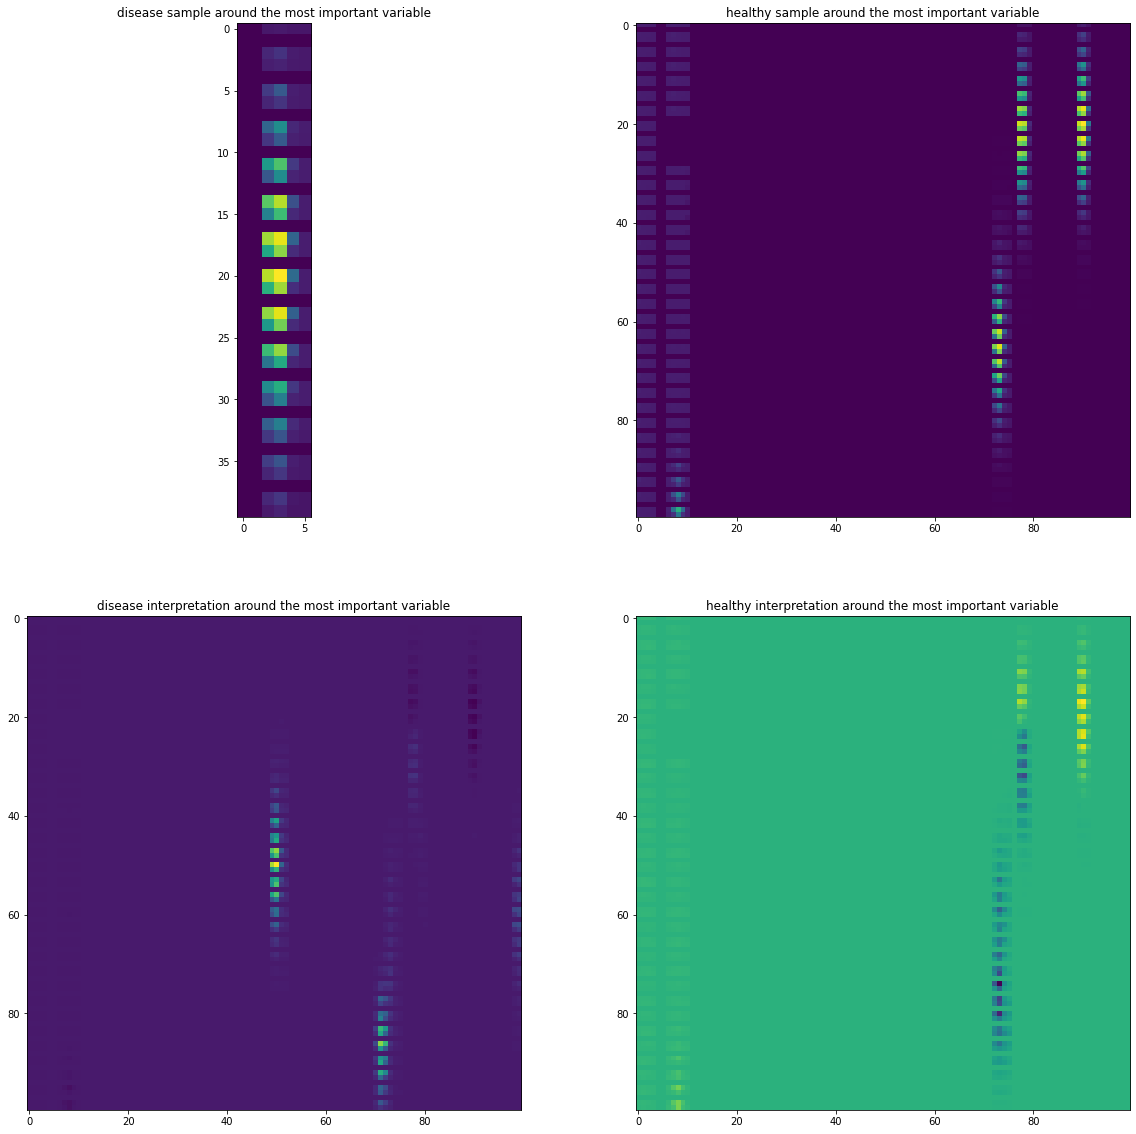

In [11]:
ind = np.unravel_index(np.argmax(Interpretation_22pep, axis=None), Interpretation_22pep.shape) 
ind
# plt.figure()
# plt.imshow(test_image_22pep_gray[ ind[0]-50:ind[0]+50, ind[1]-50:ind[1]+50 ])


f, axs = plt.subplots(2,2, figsize=(20,20))
axs[0,0].imshow(test_image_22pep_gray[ ind[0]-20:ind[0]+20, ind[1]-3:ind[1]+3 ])
axs[0,0].set_title('disease sample around the most important variable')
axs[0,1].imshow(test_image_20pep_gray[ ind[0]-50:ind[0]+50, ind[1]-50:ind[1]+50 ])
axs[0,1].set_title('healthy sample around the most important variable')


axs[1,0].imshow(Interpretation_22pep[ ind[0]-50:ind[0]+50, ind[1]-50:ind[1]+50 ])
axs[1,0].set_title('disease interpretation around the most important variable')

axs[1,1].imshow(Interpretation_20pep[ ind[0]-50:ind[0]+50, ind[1]-50:ind[1]+50 ])
axs[1,1].set_title('healthy interpretation around the most important variable')


3d plots of above 2plots

Find the first ith important areas of the test image diff 

In [12]:
indices_diff_image = []

data = np.copy(test_image_dif)
for i in range(2000):
    ind = np.unravel_index(np.argmax(data, axis=None), data.shape) 
    if (ind[0]>20 and ind[1]>4):
        data[ind[0]-20:ind[0]+20, ind[1]-3:ind[1]+3] =0
        indices_diff_image.append(ind)
    else:
        data[ind[0], ind[1]] =0

In [13]:
np.size(indices_diff_image)/2

1703.0

Visualize the first ith important areas of the test image diff 

In [14]:
data = np.copy(test_image_dif)
test_image_dif_importance = np.zeros((test_image_dif.shape))
for i in range(200):
    test_image_dif_importance [ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, \
                               indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ] \
    = data[indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, \
           indices_diff_image[i][1]-3:indices_diff_image[i][1]+3]
    
# plt.imshow(test_image_dif_importance)



Find the first i-th important features by local serach on the Interpretation map

In [15]:
w=13
h=2
indices = []
data = np.copy(Interpretation_22pep)
for i in range(2000):
    ind = np.unravel_index(np.argmax(data, axis=None), data.shape) 
    if (ind[0]>w and ind[1]>h):
        data[ind[0]-w:ind[0]+w, ind[1]-h:ind[1]+h] =0
        indices.append(ind)
    else:
        data[ind[0], ind[1]] =0

In [16]:
np.shape(indices)

(1695, 2)

decrease the FP slected peaks using the Interpretation map of healthy areas. The selected area will be rejected if it has the negeive weight in the same region in healthy intrpretaton map.

In [17]:

indices_improved = []

data_improved = np.copy(Interpretation_22pep)
for i in range(10000):
    ind = np.unravel_index(np.argmax(data_improved, axis=None), data.shape) 
    if (ind[0]>w and ind[1]>h and Interpretation_20pep[ind[0], ind[1]] >= 0):
        data_improved[ind[0]-w:ind[0]+w, ind[1]-h:ind[1]+h] =0
        indices_improved.append(ind)
    else:
        data_improved[ind[0], ind[1]] =0
        


In [18]:
np.shape(indices_improved)
# indices_improved

(621, 2)

visualize the mean of the images with 22 peptide with just having first i important indices with the window of 20 , 3 .

<ipython-input-8-b3bda7bc4b53>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_true = np.zeros((1500,2500), np.int)
<ipython-input-8-b3bda7bc4b53>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for

0.8501360279828993 0.8554669169404036 0.8448941758071992


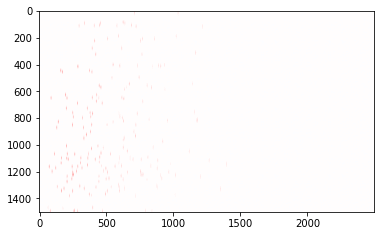

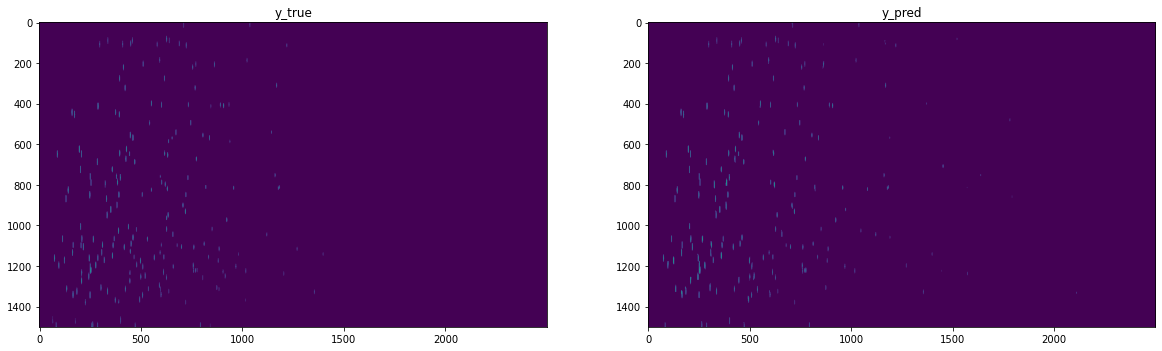

In [19]:
data = np.copy(test_image_22pep_gray)
Interpretation_importance = np.zeros((test_image_20pep_gray.shape))
indices_ = indices_improved
# for i in range(795):
for i in range(200):

    if (indices_[i][0]>20 and indices_[i][1]>3):
        Interpretation_importance [ indices_[i][0]-20:indices_[i][0]+20, indices_[i][1]-3:indices_[i][1]+3] = \
        data[indices_[i][0]-20:indices_[i][0]+20, indices_[i][1]-3:indices_[i][1]+3]
    
    else:
        Interpretation_importance [ indices_[i][0], indices_[i][1]] = \
        data[indices_[i][0], indices_[i][1] ]

plt.imshow(test_image_dif_importance, cmap="seismic", clim=(-1, 1))
roi , r_, r__, y_pred_22, y_true_22 = ROI_function((test_image_dif_importance),0.1,Interpretation_importance,0.1)#the best threshhold


In [20]:
print('roi, precision, recal', roi,r_,r__)

roi, precision, recal 0.8501360279828993 0.8554669169404036 0.8448941758071992


In [31]:
# 0.7904375089069403 0.7715954931144805 0.8102541630148992

In [ ]:
#Measure how many boxes are selected

Visualize the predicted important areas 

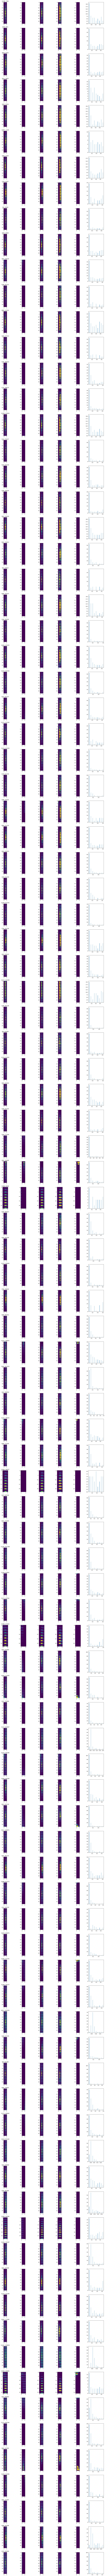

In [23]:
# max_value= np.max([test_image_20pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ],
#                        test_image_22pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], 
#                        test_image_dif[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ]])

f, axs = plt.subplots(100,6,figsize=(20,500))
for i in range(100):
# f, axs = plt.subplots(2,5,figsize=(20,10))
# for i in range(2):
    
    axs[i,0].set_title(str(indices[i])+str(i))
    max_value= np.max([test_image_20pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ],
                       test_image_22pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], 
                       test_image_dif[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ]])

    min_value = np.min([test_image_20pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ],
                       test_image_22pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], 
                       test_image_dif[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ]])

    axs[i,0].imshow(test_image_22pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,0].set_title('disease sample around the most important variable')
    axs[i,1].imshow(test_image_20pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,1].set_title('healthy sample around the most important variable')
    axs[i,2].imshow(test_image_dif_[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], vmin=min_value, vmax=max_value)
    
    
    axs[i,3].imshow(Interpretation_22pep[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], vmin=0, vmax=0.1)
    axs[i,4].imshow(Interpretation_20pep[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ], vmin=0, vmax=0.01)
    
    count, bins = np.histogram((test_image_22pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ]))
    axs[i,5].hist(bins[1:-1], bins=100, weights=count[1:])

#     count_, bins_ = np.histogram((test_image_20pep_gray[ indices[i][0]-20:indices[i][0]+20, indices[i][1]-3:indices[i][1]+3 ]))
#     axs[i,6].hist(bins_[1:-1], bins=100, weights=count_[1:])

(Visualize the predicted important areas) IMPROVED VERSION

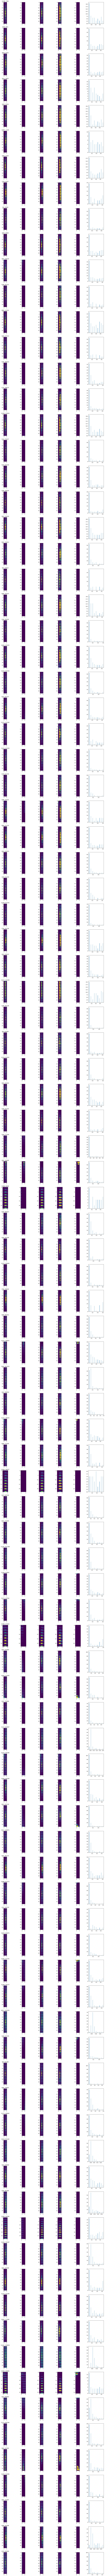

In [24]:
# max_value= np.max([test_image_20pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ],
#                        test_image_22pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], 
#                        test_image_dif[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ]])

f, axs = plt.subplots(100,6,figsize=(20,500))
for i in range(100):
# f, axs = plt.subplots(2,5,figsize=(20,10))
# for i in range(2):
    
    axs[i,0].set_title(str(indices_improved[i])+str(i))
    max_value= np.max([test_image_20pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ],
                       test_image_22pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], 
                       test_image_dif[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ]])

    min_value = np.min([test_image_20pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ],
                       test_image_22pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], 
                       test_image_dif[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ]])

    axs[i,0].imshow(test_image_22pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,0].set_title('disease sample around the most important variable')
    axs[i,1].imshow(test_image_20pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,1].set_title('healthy sample around the most important variable')
    axs[i,2].imshow(test_image_dif_[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], vmin=min_value, vmax=max_value)
    
    
    axs[i,3].imshow(Interpretation_22pep[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], vmin=0, vmax=0.1)
    axs[i,4].imshow(Interpretation_20pep[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ], vmin=0, vmax=0.01)
    
    count, bins = np.histogram((test_image_22pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ]))
    axs[i,5].hist(bins[1:-1], bins=100, weights=count[1:])

#     count_, bins_ = np.histogram((test_image_20pep_gray[ indices_improved[i][0]-20:indices_improved[i][0]+20, indices_improved[i][1]-3:indices_improved[i][1]+3 ]))
#     axs[i,6].hist(bins_[1:-1], bins=100, weights=count_[1:])

Visualize the the ground truth areas

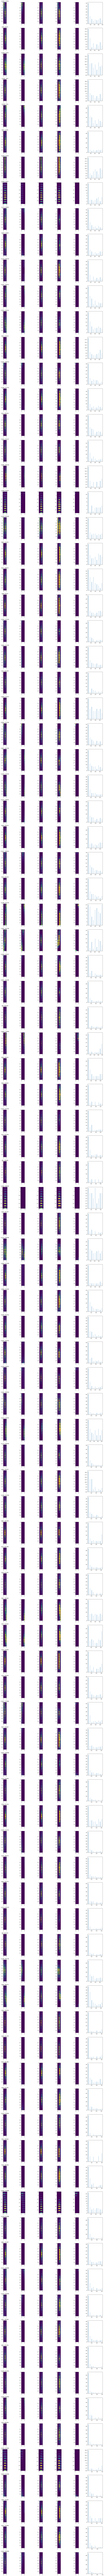

In [25]:

f, axs = plt.subplots(100,6,figsize=(20,500))
for i in range(100):
    axs[i,0].set_title(str(indices_diff_image[i])+str(i))
    max_value= np.max([test_image_20pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ],
                       test_image_22pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], 
                       test_image_dif[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ]])

    min_value = np.min([test_image_20pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ],
                       test_image_22pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], 
                       test_image_dif[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ]])

    axs[i,0].imshow(test_image_22pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,0].set_title('disease sample around the most important variable')
    axs[i,1].imshow(test_image_20pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], vmin=min_value, vmax=max_value)
#     axs[i,1].set_title('healthy sample around the most important variable')
    axs[i,2].imshow(test_image_dif_[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], vmin=min_value, vmax=max_value)
    
    
    axs[i,3].imshow(Interpretation_22pep[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], vmin=0, vmax=0.1)
    axs[i,4].imshow(Interpretation_20pep[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ], vmin=0, vmax=0.1)
    
    count, bins = np.histogram((test_image_22pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ]))
    axs[i,5].hist(bins[1:-1], bins=100, weights=count[1:])

#     count_, bins_ = np.histogram((test_image_20pep_gray[ indices_diff_image[i][0]-20:indices_diff_image[i][0]+20, indices_diff_image[i][1]-3:indices_diff_image[i][1]+3 ]))
#     axs[i,6].hist(bins_[1:-1], bins=100, weights=count_[1:])



Visualize the sum of true different and interpretatin on MZ values. sum of all values along the columns. and visualization of corrolation of these two.

[[1.         0.88775502]
 [0.88775502 1.        ]]


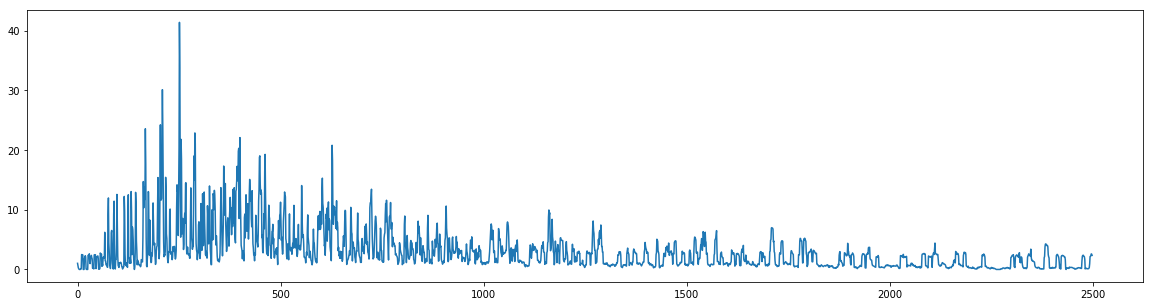

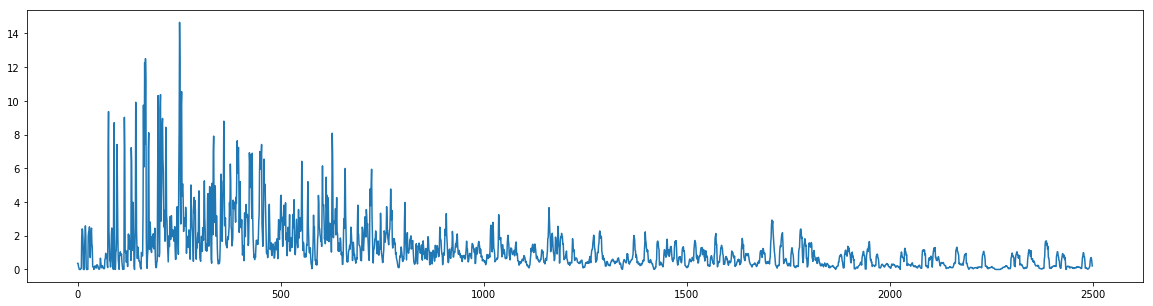

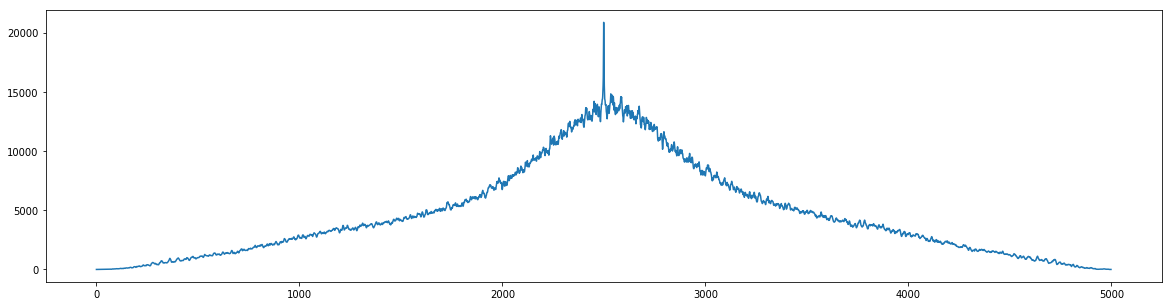

In [39]:
test_image_dif_on_MZ = np.sum(test_image_dif, axis =0)
Interpretation_22pep_on_MZ = np.sum(np.abs(Interpretation_22pep), axis=0)
np.size(Interpretation_22pep_on_MZ)
plt.figure(figsize = (20,5))
plt.plot(test_image_dif_on_MZ)
plt.figure(figsize = (20,5))
plt.plot(Interpretation_22pep_on_MZ)

# f, axs1 = plt.subplots(2,1, figsize = (20,5))
# axs1[0,0]= plt.plot(test_image_dif_on_MZ)
# axs1[0,1]= plt.plot(Interpretation_22pep_on_MZ)
corrolation = numpy.correlate(test_image_dif_on_MZ,Interpretation_22pep_on_MZ,'full')
plt.figure(figsize = (20,5))
plt.plot(corrolation)
print( numpy.corrcoef(test_image_dif_on_MZ,Interpretation_22pep_on_MZ,'full'))